# MNIST Handwritten Digit Recognition

#### Build a simple neural network and train it on a GPU-enabled server to recognize handwritten digits using the MNIST dataset.

In [88]:
#Importing required datsets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [89]:
from keras.datasets import  mnist
(train_img, train_lbl),(test_img, test_lbl) = mnist.load_data()

***Visualising the Input datas***

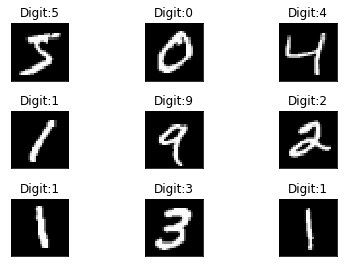

In [90]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i], cmap='gray', interpolation='none')
  plt.title(f'Digit:{train_lbl[i]}')
  plt.tick_params(axis='x',bottom=False, labelbottom=False)
  plt.tick_params(axis='y',left=False, labelleft=False)

Text(0.5, 1.0, 'Pixel Value Distribution')

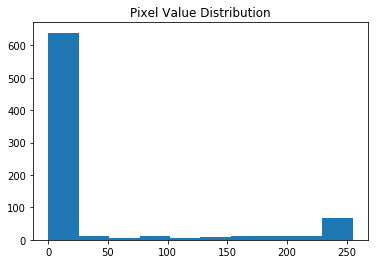

In [91]:
fig = plt.figure()
plt.hist(train_img[0].reshape(784)) 
plt.title('Pixel Value Distribution')

In [92]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


***building the input vector from the 28x28 pixels***

In [93]:
train_img = train_img.reshape(60000,28*28)
train_img = train_img.astype('float32')
test_img = test_img.reshape(10000,28*28)
test_img = test_img.astype('float32')

***normalizing the data to help with the training***

In [94]:
train_img /= 255
test_img /=255

In [95]:
print(train_img.shape)
print(test_img.shape)

(60000, 784)
(10000, 784)


In [96]:
print(np.unique(train_lbl, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [97]:
from keras.utils import np_utils
train_lbl = np_utils.to_categorical(train_lbl, 10)
test_lbl = np_utils.to_categorical(test_lbl, 10)
print(train_lbl.shape)
print(test_lbl.shape)

(60000, 10)
(10000, 10)


In [98]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()

In [99]:
classifier.add(Dense(units=512, kernel_initializer='uniform', activation='relu', input_dim=784))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))

In [100]:
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='softmax'))

In [101]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
hist = classifier.fit(train_img,train_lbl,batch_size=200,epochs=20, validation_data=(test_img, test_lbl))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0527 - acc: 0.9819 - val_loss: 0.0226 - val_acc: 0.9924
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0154 - val_acc: 0.9948
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0150 - acc: 0.9950 - val_loss: 0.0145 - val_acc: 0.9950
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.0128 - val_acc: 0.9957
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0095 - acc: 0.9968 - val_loss: 0.0119 - val_acc: 0.9957
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0114 - val_acc: 0.9961
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0128 - val_acc

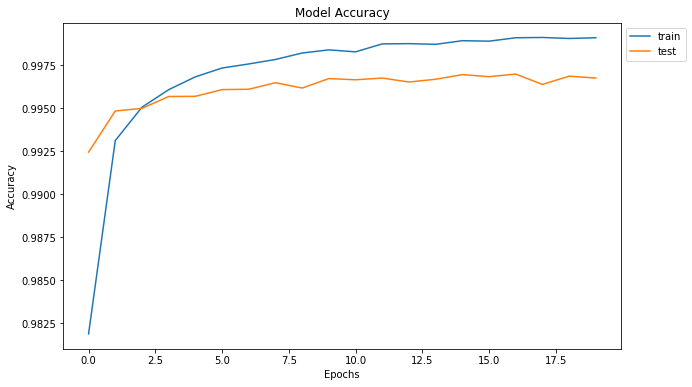

In [103]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'],bbox_to_anchor=(1,1))

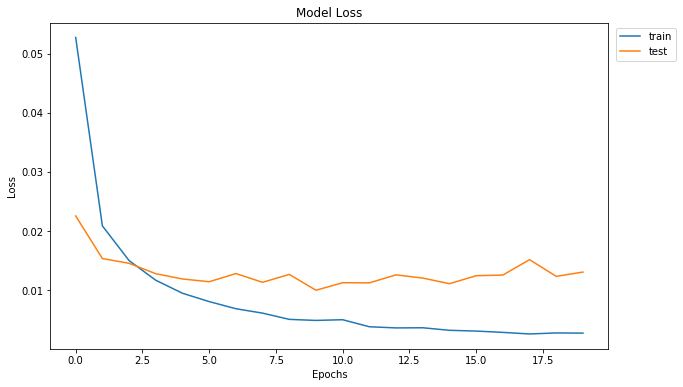

In [104]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'],bbox_to_anchor=(1.13,1))

In [105]:
classifier.evaluate(test_img, test_lbl) 

10000/10000 [==============================] - 1s 50us/step


[0.013063913314282059, 0.9967399959564209]

In [106]:
pred_class = classifier.predict_classes(test_img)
test_class = mnist.load_data()[1][1]

In [107]:
print(f'Classified correctly: {sum(pred_class == test_class)}')
print(f'Classified incorrectly: {sum(pred_class != test_class)}')

Classified correctly: 9833
Classified incorrectly: 167


##### Visualising few in-correct predictions

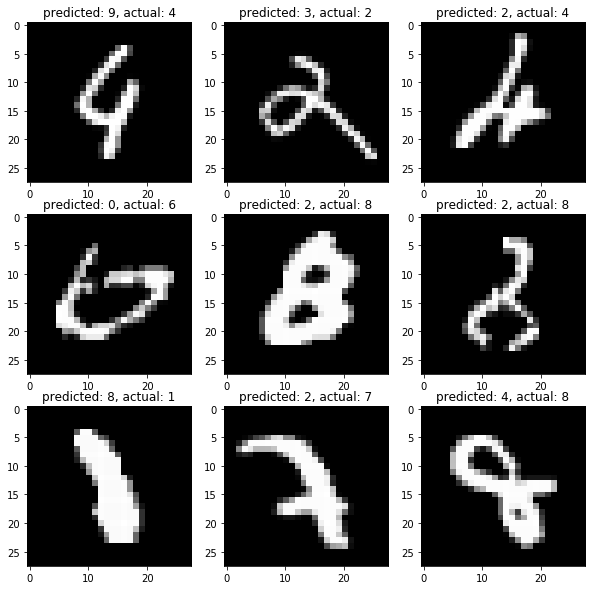

In [108]:
incorrect_indx = np.nonzero(pred_class != test_class)[0]
fig = plt.figure(figsize = (10,10))
for i,j in enumerate(incorrect_indx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_img[j].reshape(28,28), cmap='gray', interpolation='none', aspect='auto')
    plt.title(f'predicted: {pred_class[j]}, actual: {test_class[j]}')


# Conclusion

#### As can be seen that the incorrect predictions are quite illegible even for human eyes. Thus it can be concluded the model is working fine